<a href="https://colab.research.google.com/github/jungsuryu/study-miscellaneous/blob/main/forecast_fbprophet_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## fbprophet 기초

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 1
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


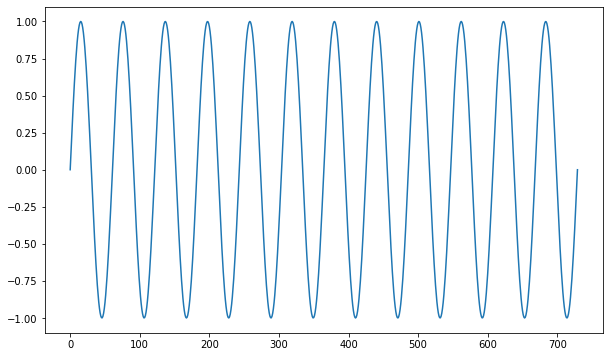

In [ ]:
df["y"].plot(figsize=(10, 6));

In [ ]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [ ]:
future = m.make_future_dataframe(periods=30) # 앞으로 30일간의 데이터 예측
forecast = m.predict(future)

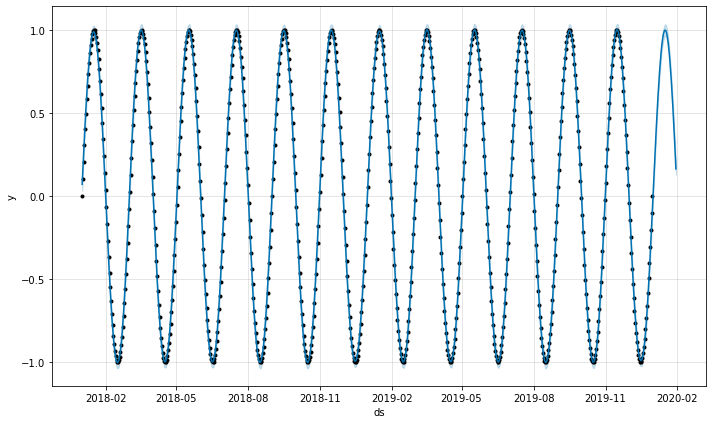

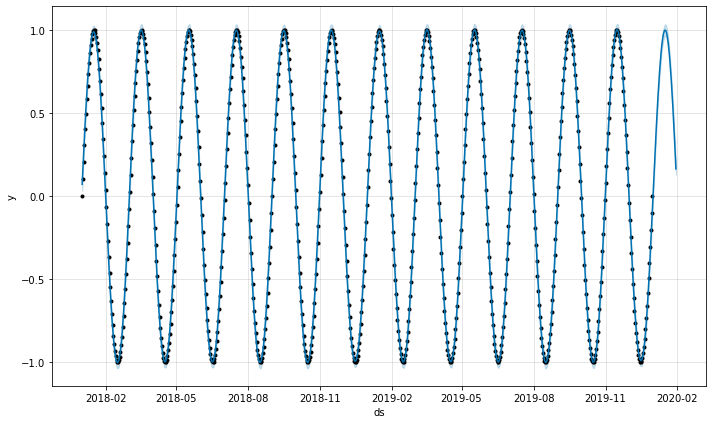

In [ ]:
m.plot(forecast)

---

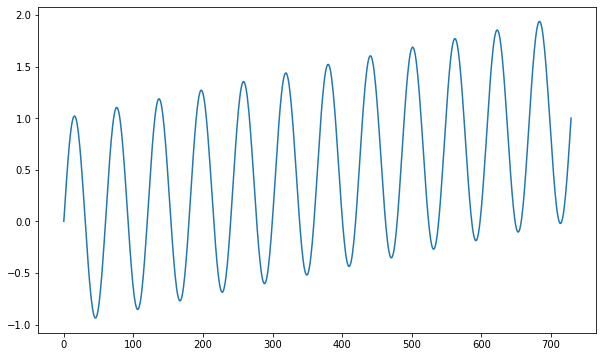

In [ ]:
# 2
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

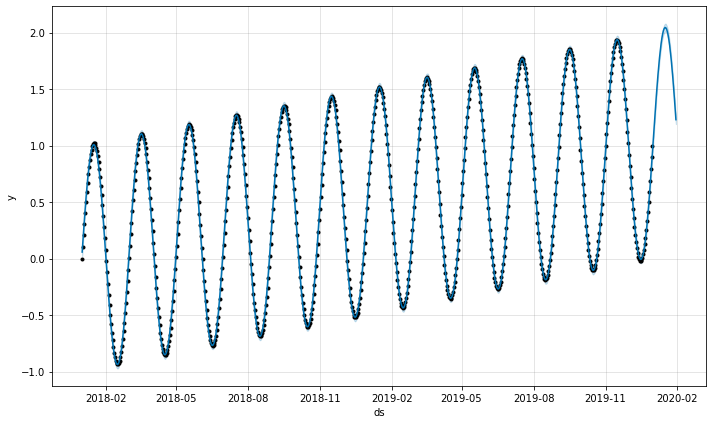

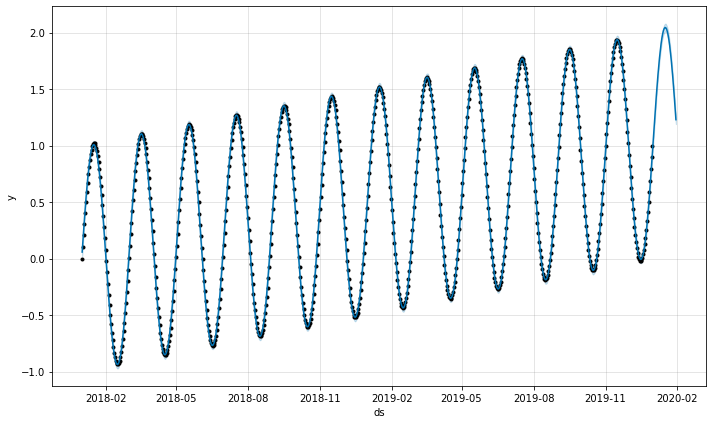

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

---

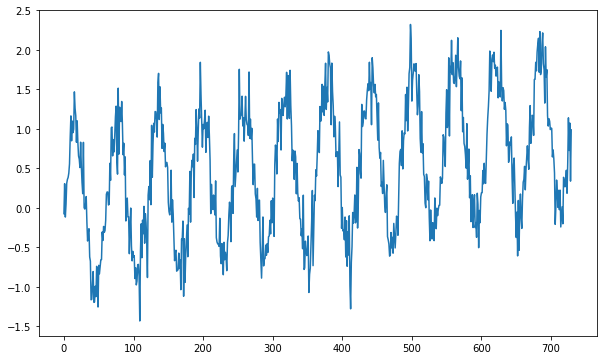

In [ ]:
# 3
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result}) 
df["y"].plot(figsize=(10, 6))

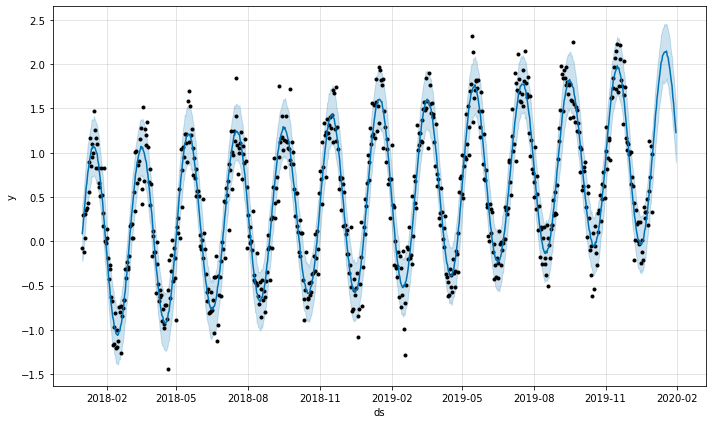

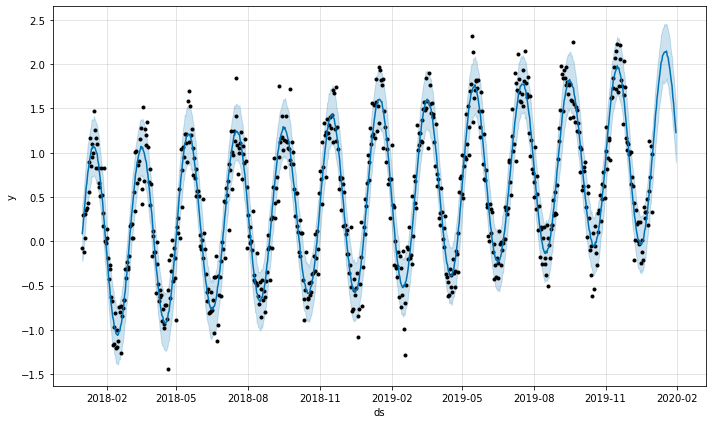

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

# 시계열 데이터 실전 이용
- https://pinkwink.kr/

In [ ]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [ ]:
pinkwink_web = pd.read_csv(
    "/content/drive/MyDrive/data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


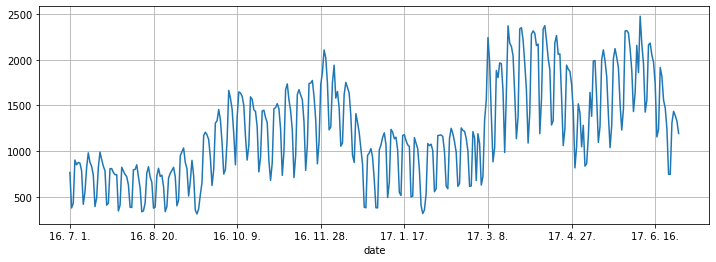

In [ ]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

In [ ]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
traffic = pinkwink_web["hit"].values
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [ ]:
fx = np.linspace(0, time[-1], 1000) # 1차원 배열 만드는 기능

In [ ]:
# 에러를 계산할 함수
def error(f, x, y):
  return np.sqrt(np.mean((f(x) - y) ** 2))

In [ ]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [ ]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.47773021321143


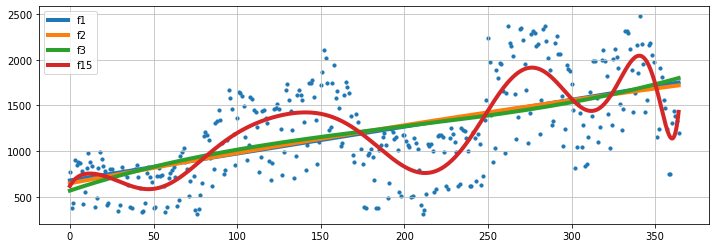

In [ ]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [ ]:
df = pd.DataFrame({"ds": pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [ ]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [ ]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어짐
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,905.470470,700.951159,1120.614763
421,2017-08-26,490.545920,273.341476,692.654200
422,2017-08-27,623.104992,409.372972,842.111199
423,2017-08-28,1175.626329,964.704376,1392.237306
424,2017-08-29,1211.572042,992.995505,1410.326689


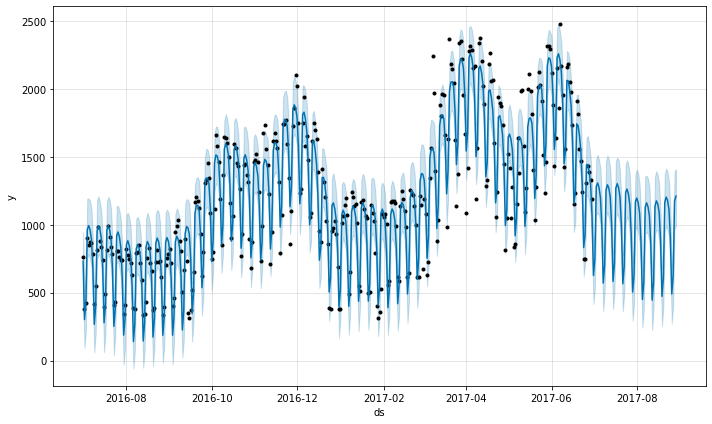

In [ ]:
m.plot(forecast);

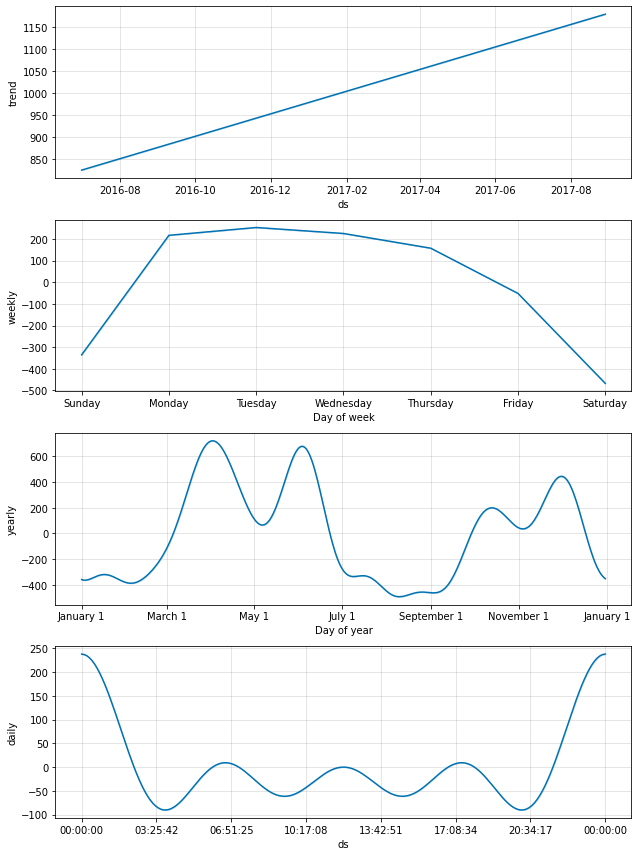

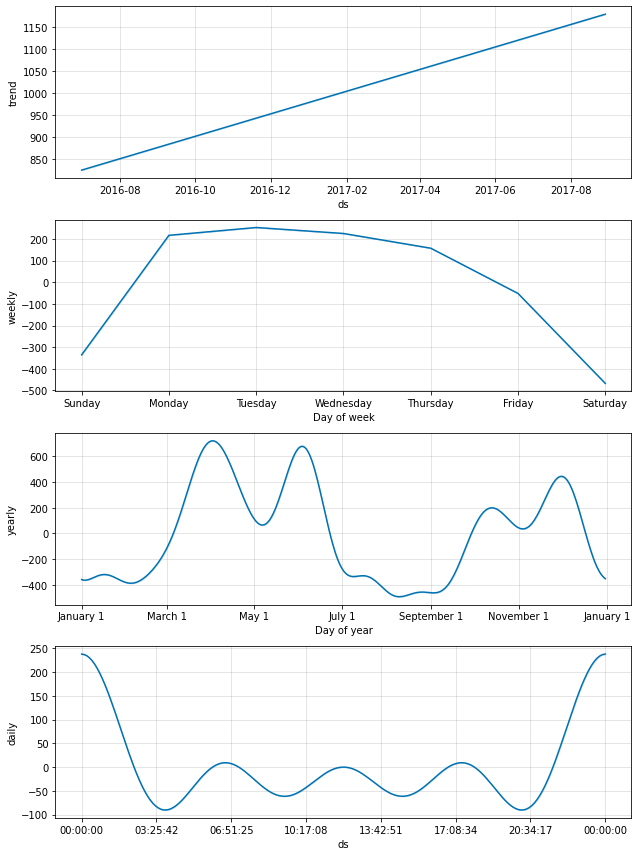

In [ ]:
m.plot_components(forecast)